In [1]:
from analyze_experiment_in_progress import get_data_from_logs
from copy import deepcopy
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = get_data_from_logs("./results/ml1m_bert4rec_ft_2022_10_25T13_36_04/stdout", 0)

In [3]:
data_full = []
data_sampled = []
for item in data:
    if 'sampled_metrics' not in item:
        continue
    item_copy = deepcopy(item)
    del(item_copy['sampled_metrics'])
    item_sampled = item['sampled_metrics']
    for key in list(item_sampled.keys()):
        item_copy["sampled_" + key] = item_sampled[key]
    data_full.append(item_copy)
    data_sampled.append(item_sampled)

In [4]:
df = pd.DataFrame(data_full)
df = df.set_index('model_name').sort_values('ndcg@10')

In [5]:
def get_df(df, sampling_type):
    name_prefix = f"BERT4RecScale{sampling_type}"
    sampling_df = df[df.index.map(lambda x: x.startswith(name_prefix))]
    num_samples = sampling_df.index.map(lambda x: int(x[len(name_prefix):]))
    sampling_df.insert(0, 'num_samples', num_samples)
    sampling_df = sampling_df.sort_values('num_samples')
    return sampling_df



In [6]:
def plot_hits(df, sampling_type, popularity_metrics=False):
    models_df = get_df(df, sampling_type)
    if not popularity_metrics:
        plt.plot(models_df['num_samples'], models_df['HIT@10'], label = sampling_type)
    else:
        plt.plot(models_df['num_samples'], models_df['sampled_HIT@10'], label = sampling_type)


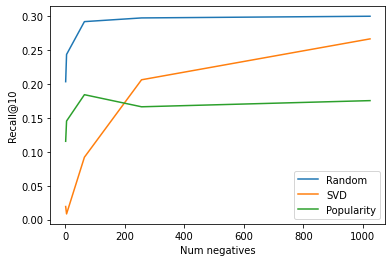

In [7]:
plot_hits(df, 'Random')
plot_hits(df, 'SVD')
plot_hits(df, 'Popularity')
plt.xlabel('Num negatives')
plt.ylabel('Recall@10')
plt.legend()

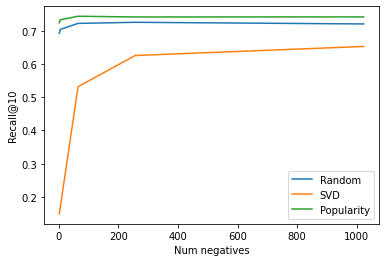

In [8]:
plot_hits(df, 'Random', True)
plot_hits(df, 'SVD', True)
plot_hits(df, 'Popularity', True)
plt.xlabel('Num negatives')
plt.ylabel('Recall@10')
plt.legend()

In [9]:
def plot_time(df, sampling_type):
    models_df = get_df(df, sampling_type)
    plt.plot(models_df['num_samples'], models_df['model_build_time'], label = sampling_type)

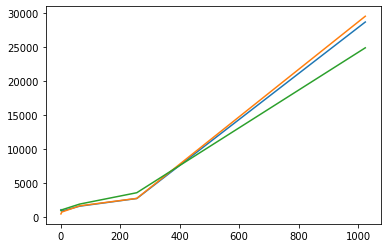

In [131]:
plot_time(df, 'Random')
plot_time(df, 'SVD')
plot_time(df, 'Popularity')